In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_163.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_330.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_498.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_167.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_76.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_439.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_226.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_168.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_96.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_64.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_373.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_115.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_20.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_559.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/

In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
batch_size = 40
img_height = 256
img_width = 256

In [4]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/yawn-eye-dataset-new/dataset_new/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/kaggle/input/yawn-eye-dataset-new/dataset_new/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [5]:
class_names = training_ds.class_names
print(class_names)

['Closed', 'Open', 'no_yawn', 'yawn']


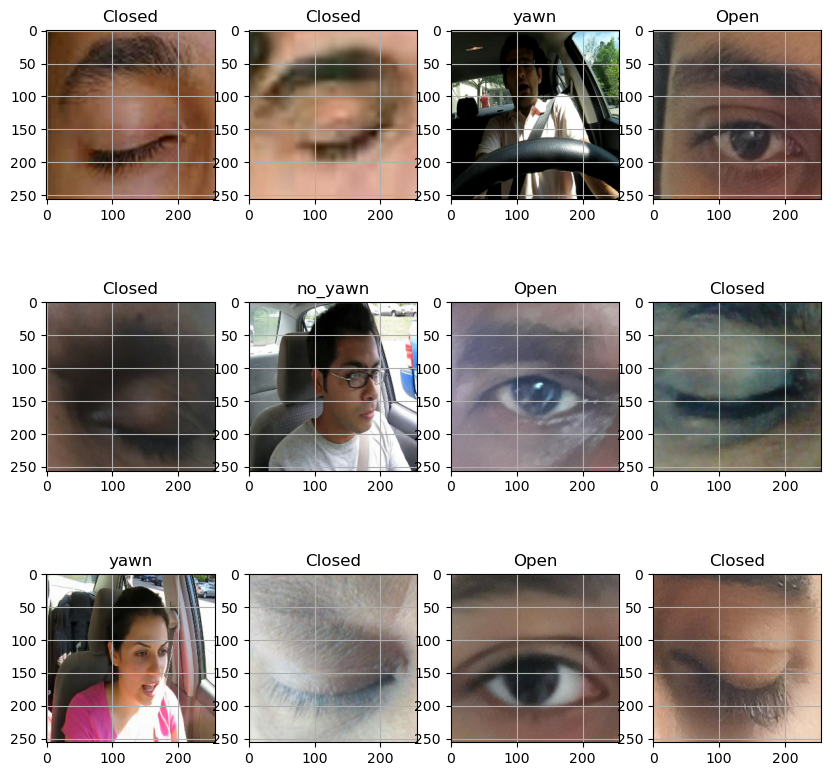

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [7]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
  [
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3))
  ]
)

In [8]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-jdwzqyus
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-jdwzqyus
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33809 sha256=cde03de6307d4eda62e7d200e03868bb2a3c18c1ad9adea249616b009dc2be09
  Stored in directory: /tmp/pip-ephem-wheel-cache-4mit616c/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models
Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras import applications

In [10]:
from tensorflow.keras.applications.vgg19 import VGG19

In [11]:
from tensorflow.keras.optimizers import Adam

In [12]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [13]:
from tensorflow.keras.applications import ResNet152V2

In [14]:
import efficientnet.tfkeras as efn
model = tf.keras.Sequential([data_augmentation,
      layers.Rescaling(1./255),
                             efn.EfficientNetB3(input_shape=(256, 256, 3),
                                                    weights='imagenet',
                                                    include_top=False),
                             
                             #applications.InceptionV3(weights='imagenet', 
                             #   include_top=False, 
                             #   input_shape=(256, 256, 3)),
                             
                            #tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                            #ResNet152V2(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                            #VGG19(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                                 layers.GlobalAveragePooling2D(),
                                 layers.Dropout(0.4),
                                 layers.BatchNormalization(),
                                 layers.Dense(64, activation='relu'),
                                 layers.BatchNormalization(),
                                 layers.Dropout(0.4),
                                 
                                 layers.Dense(4,
                                         activation='softmax')])
    
    
        
early_stopping = tf.keras.callbacks.EarlyStopping(patience=16,
                                                  monitor="val_loss",
                                                  verbose=2,
                                                  mode="auto")
checkpoint = tf.keras.callbacks.ModelCheckpoint("best.h5", 
                                                monitor="val_loss",
                                                mode="auto",
                                                verbose=2,
                                                save_best_only=True)
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


44107200/44107200 [==============================] - 1s 0us/step


In [15]:

history = model.fit(
    training_ds,
    validation_data=testing_ds,
    epochs=64,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/64


2023-04-05 22:59:56.294748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnet-b3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


62/62 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9124
Epoch 1: val_loss improved from inf to 0.05206, saving model to best.h5
62/62 [==============================] - 126s 896ms/step - loss: 0.2226 - accuracy: 0.9124 - val_loss: 0.0521 - val_accuracy: 0.9746
Epoch 2/64
62/62 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9887
Epoch 2: val_loss improved from 0.05206 to 0.01690, saving model to best.h5
62/62 [==============================] - 52s 825ms/step - loss: 0.0458 - accuracy: 0.9887 - val_loss: 0.0169 - val_accuracy: 0.9954
Epoch 3/64
62/62 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9947
Epoch 3: val_loss did not improve from 0.01690
62/62 [==============================] - 52s 821ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0315 - val_accuracy: 0.9931
Epoch 4/64
62/62 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9947
Epoch 4: val_loss did not improve from 0.01

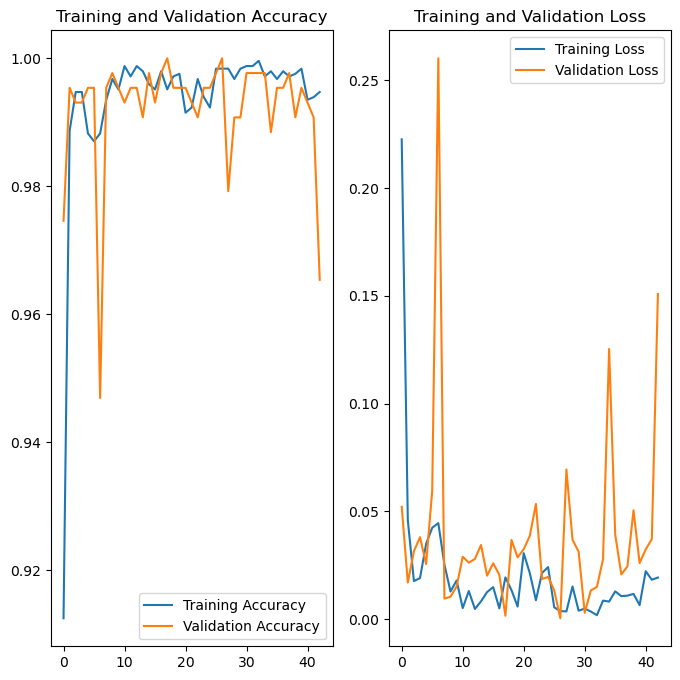

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 74ms/step


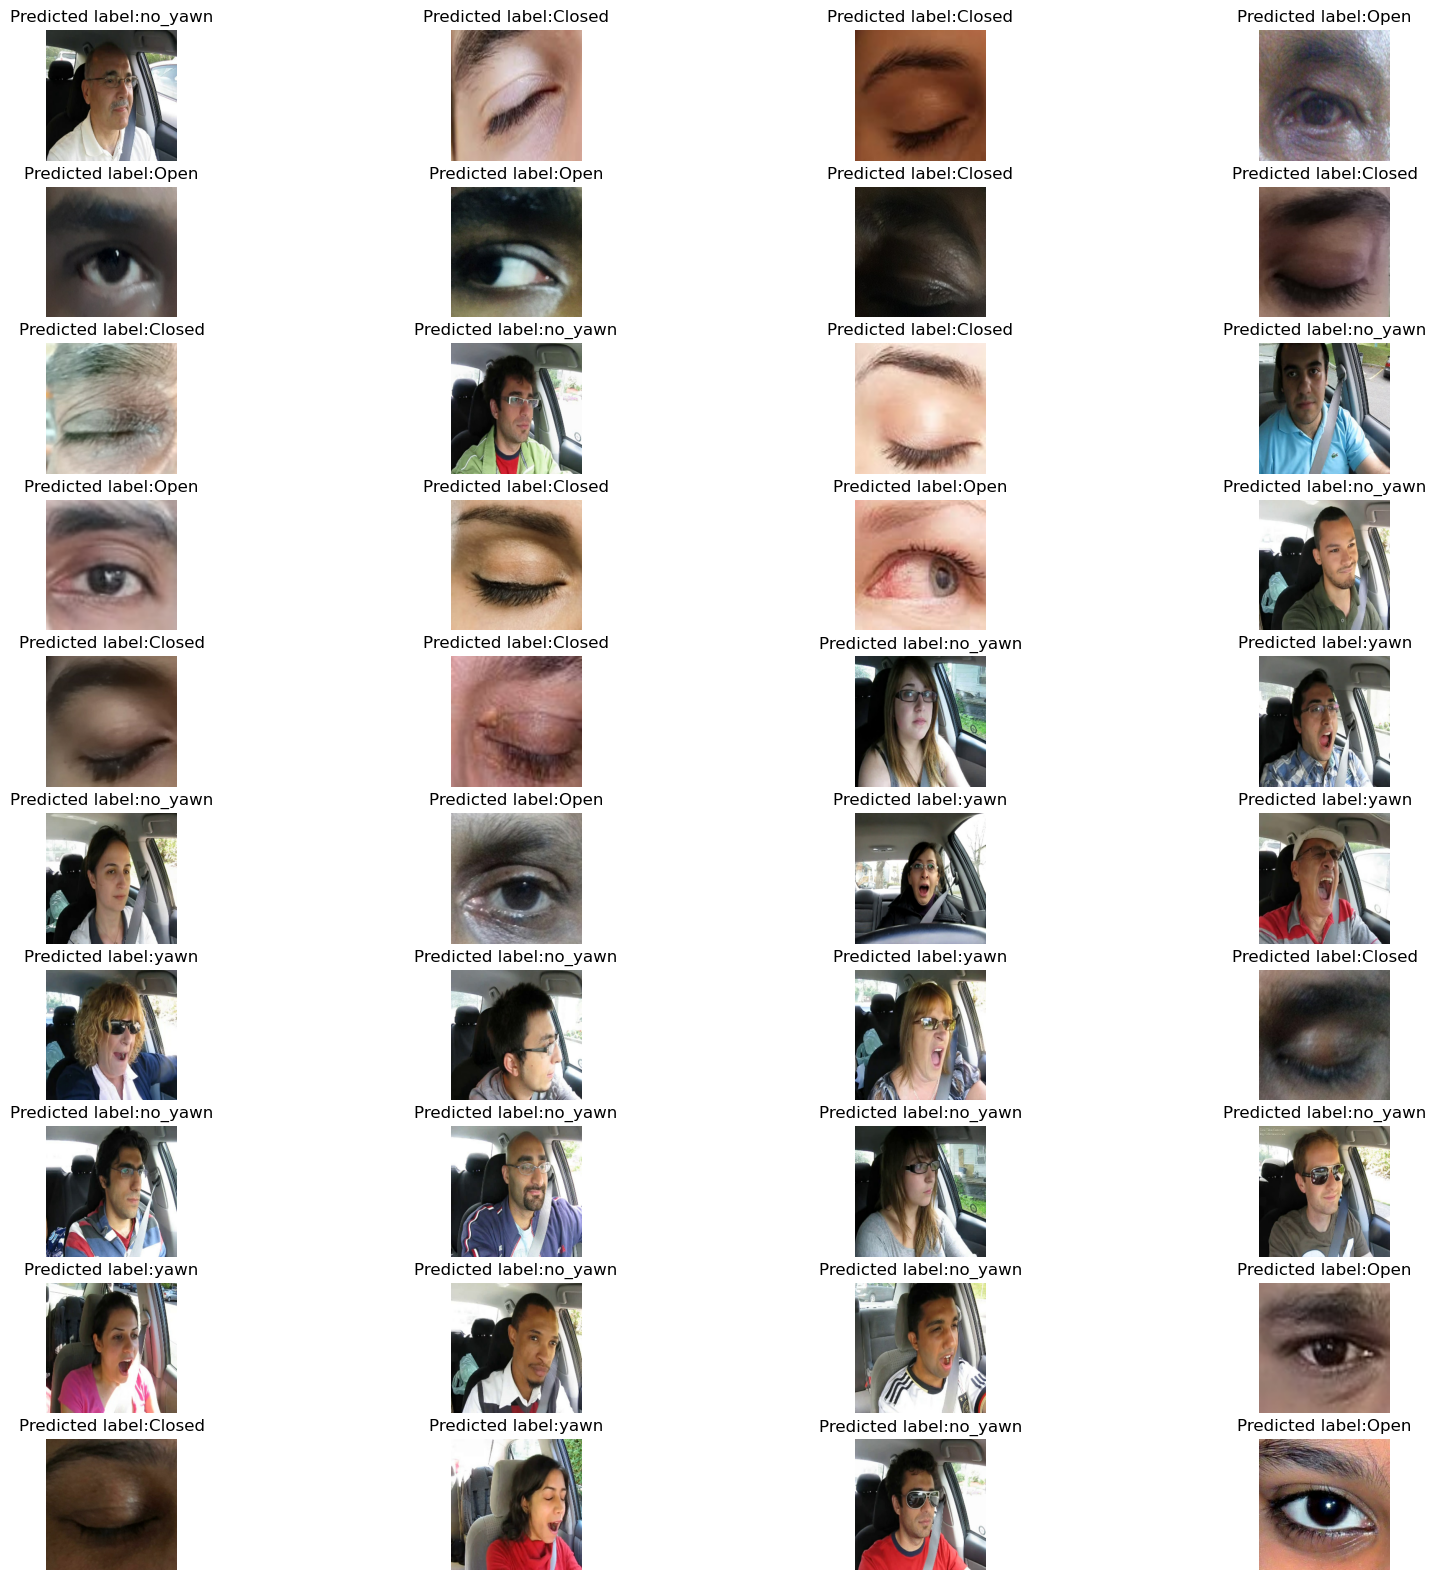

In [17]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)